# Search Algorithms

Author: Thien Tran

Last updated: 10 Feb 2021

In [1]:
from search import Search

## Problem definition

You want to travel from Murata to Changi Airport with public transport, but your Google Maps is down. Luckily, you have the map of Singapore, and public transport travelling time. You will use this information to travel in the minimum amount of time!


Position

Location | latitude, longitude
---------|--------------------
Murata | 1.320416, 103.663811
JE | 1.333346, 103.742153
Orchard Road | 1.304943, 103.832139
Woodlands | 1.437153, 103.786114
MBS | 1.283030, 103.860739
Toa Payoh | 1.332054, 103.847695
Sentosa | 1.249295, 103.830335
Changi Airport | 1.363536, 103.991096

Travel time

From | To | Time
-----|----|-----
Murata | JE | 47min
JE | Orchard Road | 52min
JE | Woodlands | 40min
Woodlands | Toa Payoh | 56min
Toa Payoh | Orchard Road | 32min
Orchard Road | MBS | 36min
MBS | Sentosa | 55min
JE | Sentosa | 70min
Orchard Road | Sentosa | 57min
MBS | Changi Airport | 52min
Orchard Road | Changi Airport | 50min
Toa Payoh | Changi Airport | 67min
Woodlands | Changi Airport | 71min


## Technical problem formulation

Identify **states, actions, start state, end state**, and **variable to optimize**


**States**: Locations in Singapore

**Actions**: move from one location to neighboring locations, which will take some travelling time

**Start state**: Murata office

**End state**: Changi Airport

**Optimize for**: total time taken

In [2]:
location = {
            "Murata": (1.320416, 103.663811),
                "JE": (1.333346, 103.742153),
      "Orchard Road": (1.304943, 103.832139),
         "Woodlands": (1.437153, 103.786114),
               "MBS": (1.283030, 103.860739),
         "Toa Payoh": (1.332054, 103.847695),
           "Sentosa": (1.249295, 103.830335),
    "Changi Airport": (1.363536, 103.991096)
}

def distance(a, b):
    pos_a = location[a]
    pos_b = location[b]
    return ((pos_a[0]-pos_b[0])**2 + (pos_a[1]-pos_b[1])**2)**0.5 / 180 * 3.14159 * 6371

a = "Murata"
b = "Sentosa"
print(f"Distance between {a} and {b} is {distance(a,b):.2f}km")

Distance between Murata and Sentosa is 20.13km


In [3]:
travel_time = {
            "Murata": {          "JE": 47},
                "JE": {      "Murata": 47, "Orchard Road": 52,      "Woodlands": 40,   "Sentosa": 70},
      "Orchard Road": {          "JE": 52,    "Toa Payoh": 32,            "MBS": 36,   "Sentosa": 57, "Changi Airport": 50} ,
         "Woodlands": {          "JE": 40,    "Toa Payoh": 56, "Changi Airport": 71},
               "MBS": {"Orchard Road": 36,      "Sentosa": 55, "Changi Airport": 52},
         "Toa Payoh": {   "Woodlands": 56, "Orchard Road": 32, "Changi Airport": 67},
           "Sentosa": {         "MBS": 55,           "JE": 70,   "Orchard Road": 57},
    "Changi Airport": {         "MBS": 52, "Orchard Road": 50,      "Toa Payoh": 67, "Woodlands": 71}
}

def check_valid(adj_list):
    for x in adj_list:
        for y in adj_list[x]:
            # print(x,y)
            assert adj_list[x][y] == adj_list[y][x]
check_valid(travel_time)

a = "Murata"
b = "JE"
if b in travel_time[a]:
    print(f"Travelling time from {a} to {b} is {travel_time[a][b]}min")
else:
    print(f"Cannot travel directly from {a} to {b}")

Travelling time from Murata to JE is 47min


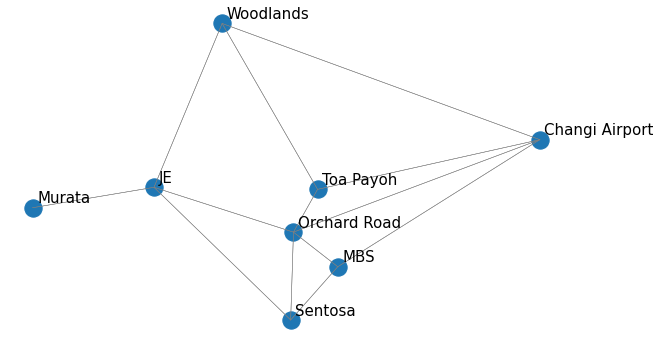

In [4]:
def plot_map(location, adj_list):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,6))
    Xs = [v[1] for v in location.values()]
    Ys = [v[0] for v in location.values()]
    plt.scatter(Xs, Ys, s=300)
    for k, v in location.items():
        offset = 0.003
        pos = v[1]+offset, v[0]+offset
        plt.annotate(k, pos, fontsize=15)

    for x in adj_list:
        for y in adj_list[x]:
            pos1 = location[x]
            pos2 = location[y]
            plt.plot([pos1[1], pos2[1]], [pos1[0], pos2[0]], c='gray', lw=0.5)

    plt.axis("off")
    
plot_map(location, travel_time)

## Test the algorithms

Use different algorithms below to see how it works. Try to see if it is the optimal path! (shortest travelling time)

Example usage:
```
search_algo = Search('dfs')
search_algo("Murata", "Changi Airport", travel_time)
plot_map(location, travel_time)

```

Supported algorithms:
- `bfs`: breadth-first search
- `dfs`: depth-first search
- `ldfs`: limited depth-first search. Required parameter `max_depth`
- `ids`: iterative-deepning depth-first search. Required parameter `max_depth`
- `ucs`: uniform cost search
- `greedy`: greedy search. Required parameter `heuristic`
- `a_star`: A* search. Required parameter `heuristic`

Strategy: dfs
Start: Murata
End: Changi Airport

Step 1
Current node: Murata
Visited nodes: {'Murata'}
Neighbors of Murata: {'JE': 47}

Candidates: ['JE']
Next node to examine: JE


Step 2
Current node: JE
Visited nodes: {'JE', 'Murata'}
Neighbors of JE: {'Murata': 47, 'Orchard Road': 52, 'Woodlands': 40, 'Sentosa': 70}

Candidates: ['Orchard Road', 'Woodlands', 'Sentosa']
Next node to examine: Sentosa


Step 3
Current node: Sentosa
Visited nodes: {'Sentosa', 'JE', 'Murata'}
Neighbors of Sentosa: {'MBS': 55, 'JE': 70, 'Orchard Road': 57}

Candidates: ['Orchard Road', 'Woodlands', 'MBS']
Next node to examine: MBS


Step 4
Current node: MBS
Visited nodes: {'Sentosa', 'JE', 'MBS', 'Murata'}
Neighbors of MBS: {'Orchard Road': 36, 'Sentosa': 55, 'Changi Airport': 52}

Candidates: ['Orchard Road', 'Woodlands', 'Changi Airport']
Next node to examine: Changi Airport


Step 5
Current node: Changi Airport
Found the destination

Full path: Murata → JE → Sentosa → MBS → Changi Airport
	Murata → JE

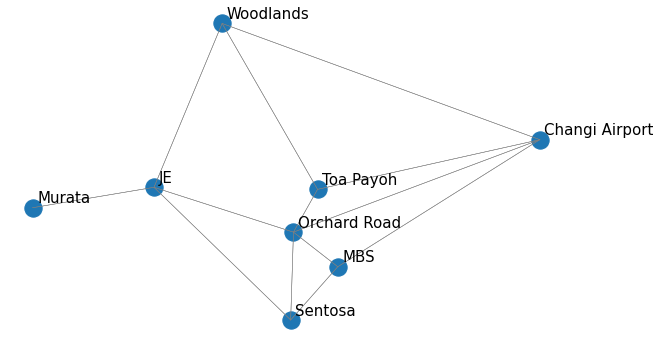

In [5]:
start = "Murata"
end = "Changi Airport"

search_algo = Search('dfs')    # change the algorithm here
search_algo(start, end, travel_time)
plot_map(location, travel_time)